Alumno: Alejandro Schiariti

In [9]:
from bs4 import BeautifulSoup
import requests
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import nltk
from nltk.corpus import stopwords
import re

In [10]:
import matplotlib.pyplot as plt

In [11]:
url = "https://www.gutenberg.org/cache/epub/58221/pg58221-images.html"

In [12]:
contenido = requests.get(url).text

In [13]:
soup = BeautifulSoup(contenido, "html.parser")

In [14]:
#Descarga corpus de stopwords en español
nltk.download('stopwords')
stopwords_es = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
#Funcion para limpiar texto
def limpiar_texto(texto):

#Lista de palabras a eliminar

  palabras_a_eliminar = ['dijo', 'así', 'aunque', 'sino', 'luego', 'pues', 'mientras', 'allí',
        'después', 'antes', 'porque', 'cuando', 'cómo', 'donde', 'cap', 'ó', 'éste', 'fué',
        'capítulo', 'verso', 'canto', 'á', 'si','más', 'día', 'tal', 'llegó', 'aquí', 'project',
        'gutenberg', 'dió', 'misma', 'nadie', 'mas', 'habló', 'ésta', 'ciudad', 'aquél',
        'i', 'ii', 'iii', 'iv', 'v', 'vi','vii', 'viii', 'ix', 'x', 'xi', 'xii', 'xiii',
        'xiv', 'xv', 'xvi', 'xvii', 'xviii', 'xix', 'xx', 'xxi', 'xxii', 'xxiii', 'xxiv',]

#Anexa las palabras que se quieren eliminar a las stopwords

  black_list = stopwords_es.union(palabras_a_eliminar)

  texto_minuscula = texto.lower() #Convierte todo el texto en minuscula

  #Elimina caracteres especiales
  texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minuscula)

  #Divide el texto en palabras individuales
  lista_palabras = texto_sin_puntuacion.split()

  #Crea lista de palabras importantes
  palabras_importantes = []

  for palabra in lista_palabras:
    if palabra not in black_list:
      palabras_importantes.append(palabra)

  #Devuelve texto limpio
  return palabras_importantes

In [22]:
texto_completo = soup.get_text()

palabras_limpias = limpiar_texto(texto_completo)

texto_limpio = ' '.join(palabras_limpias)

In [25]:
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='plasma').generate(texto_limpio)

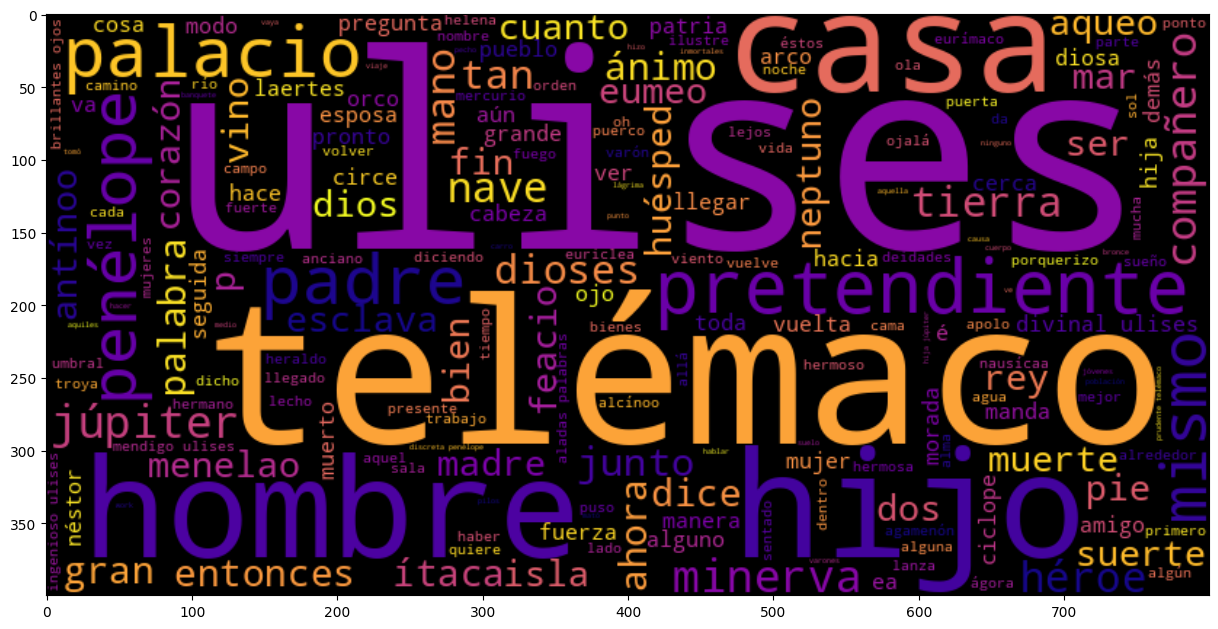

In [27]:
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("on")
plt.savefig('nombre_de_la_imagen.png') # Guarda la imagen en formato PNG
plt.show()